In [9]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('Data/GBP.csv')

In [11]:
df.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
0,17.10.2022,22.6993,22.5192,22.8629,22.4485,268.31K,0.82%
1,16.10.2022,22.5152,22.5651,22.6404,22.4846,12.73K,0.43%
2,14.10.2022,22.4193,22.6417,22.6937,22.3846,335.30K,-0.88%
3,13.10.2022,22.6178,22.2022,22.7516,22.1066,297.96K,2.05%
4,12.10.2022,22.1643,22.0267,22.2647,21.9548,322.93K,0.69%


<AxesSubplot:>

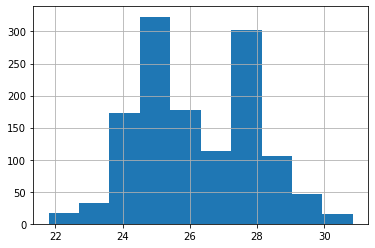

In [12]:
df['Cierre'].hist()

In [13]:
def standarise(column,pct,pct_lower):
    sc = StandardScaler()
    y = df[column][df[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [14]:
def fit_distribution(column,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))


        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [15]:
fit_distribution('Cierre',0.99,0.01)

(2.6093434307328067, -2.3911026176036385, 2.6971450535606363)

(-1.5122662294737656e-15, 0.9999999999999998)

(0.8333991183598009, 2.2961640642449237, 1.4965368689169756)

(2.2928689154127095, 2.44171640976478, -2.2799649646272355, 4.724441056456063)

(0.03203206267308839, -5.700667603037282, 177.96696748626414)

(-2.228324501972626, 4.524488566217549)

(39.17878678969245, -6.241113996424602, 0.15924466911916546)

(-2.228324501972626, 2.2283245019726245)

(0.13861479591974096, -7.2459903362745495, 7.176977363473322)

(0.539490286129668, -1.8439350468916244e-15, 1.017024498245258)

(0.6794765256034411, -2.471208142198847, 4.797155472434369)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
3          beta        70.0
0   weibull_min        85.0
9      pearson3        86.0
4      invgauss        88.0
8       lognorm        96.0
6         gamma       103.0
1          norm       125.0
10       triang       256.0
5       un

In [16]:
y_std,len_y,y = standarise('Cierre',0.99,0.01)

Text(0, 0.5, 'Frequency')

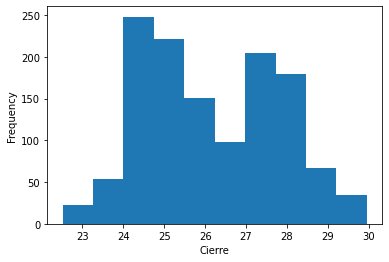

In [17]:
plt.hist(y)
plt.xlabel('Cierre')
plt.ylabel('Frequency')

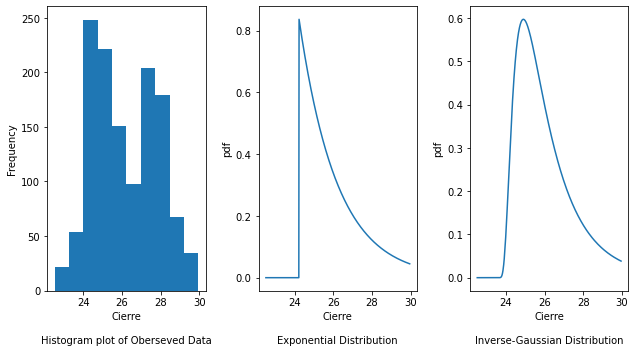

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes[0].hist(y)
axes[0].set_xlabel('Cierre\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(y,expon.pdf(y_std,-1.19, 1.19))
axes[1].set_xlabel('Cierre\n\nExponential Distribution')
axes[1].set_ylabel('pdf')
axes[2].plot(y,invgauss.pdf(y_std,0.45, -1.64, 3.61))
axes[2].set_xlabel('Cierre\n\nInverse-Gaussian Distribution')
axes[2].set_ylabel('pdf')
fig.tight_layout()

/var/folders/j_/kb3fq6hn5m1bfxm6rj3k2ng40000gn/T/ipykernel_54162/3880239139.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


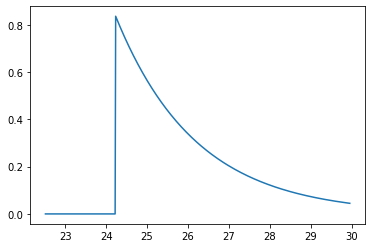

In [19]:
f = plt.figure()
plt.plot(y,expon.pdf(y_std,-1.19, 1.19))
f.show()

/var/folders/j_/kb3fq6hn5m1bfxm6rj3k2ng40000gn/T/ipykernel_54162/1841723877.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


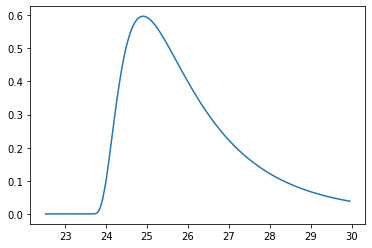

In [20]:
f = plt.figure()
plt.plot(y,invgauss.pdf(y_std,0.45, -1.64, 3.61))
f.show()

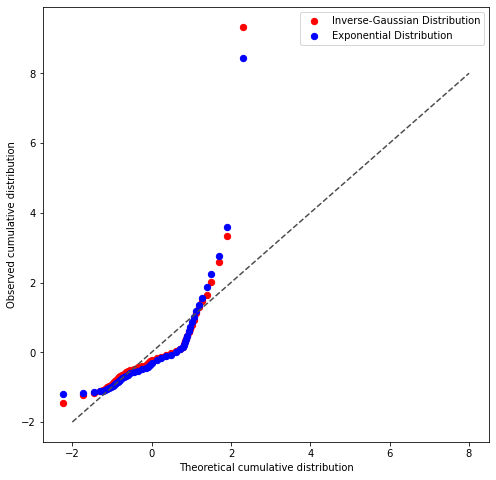

In [21]:
data_points = expon.rvs(-1.19, 1.19, size=2000)
data_points2 = invgauss.rvs(0.45, -1.64, 3.61,size = 2000)

f, ax = plt.subplots(figsize=(8,8))
ax.plot([-2, 8], [-2, 8], ls="--", c=".3")

percentile_bins = np.linspace(0,100,51)
percentile_cutoffs1 = np.percentile(y_std, percentile_bins)
percentile_cutoffs_expon= np.percentile(data_points, percentile_bins)


percentile_cutoffs_invgauss = np.percentile(data_points2, percentile_bins)


ax.scatter(percentile_cutoffs1,percentile_cutoffs_invgauss,c='r',label = 'Inverse-Gaussian Distribution',s = 40)
ax.scatter(percentile_cutoffs1,percentile_cutoffs_expon,c='b',label = 'Exponential Distribution',s = 40)


ax.set_xlabel('Theoretical cumulative distribution')
ax.set_ylabel('Observed cumulative distribution')
ax.legend()
plt.show()
